In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.morphology

image = cv2.imread("D:/2024_Marten-Thesis/Verwerking_images_RGB/L9/GSM_stip_bean.jpg")

In [2]:
import scipy.ndimage as snd

In [3]:
import skimage
skimage.__version__

'0.21.0'

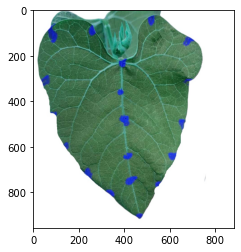

In [4]:
plt.imshow(image)

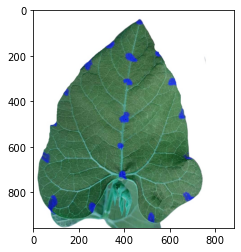

In [5]:
plt.imshow(image[::-1,:,:])

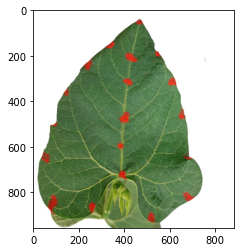

In [6]:
plt.imshow(image[::-1,:,::-1])

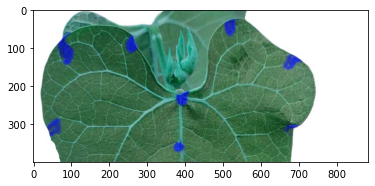

In [7]:
plt.imshow(image[:400,:,:])

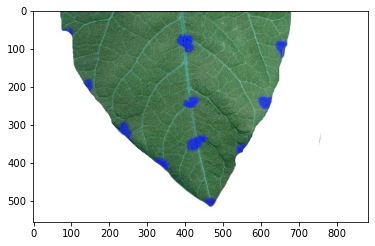

In [8]:
plt.imshow(image[400:,:,:])

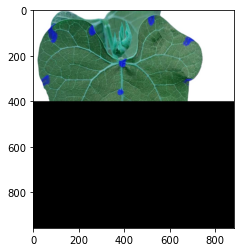

In [9]:
image_black = image.copy()
image_black[400:,:,:] = 0
plt.imshow(image_black)

# Titel

In [10]:
image = plt.imread("D:/2024_Marten-Thesis/Verwerking_images_RGB/L9/GSM_stip_bean.jpg")

In [11]:
# eventueel hiernog blur toevoegen om ze aan elkaar te smeren


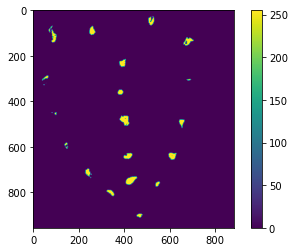

In [12]:
min_red = np.array([170, 0, 0])  # min. limit Red (RGB)
max_red = np.array([255, 80, 80])  # max. limit Red (RGB)
 
mask = cv2.inRange(image, min_red, max_red)
plt.imshow(mask)
plt.colorbar()

<ipython-input-13-65d4cb3a7c8b>:1: DeprecationWarning: Please use `binary_dilation` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  image_dilated = snd.morphology.binary_dilation(mask, iterations=20)


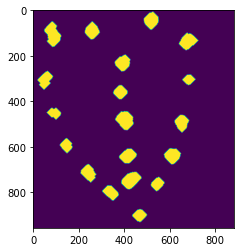

In [13]:
image_dilated = snd.morphology.binary_dilation(mask, iterations=20)
plt.imshow(image_dilated)

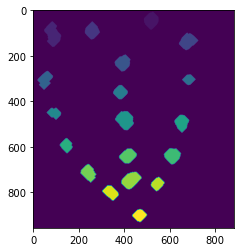

In [16]:
mask_labeled = skimage.morphology.label(image_dilated)
#print(mask)
plt.imshow(mask_labeled)

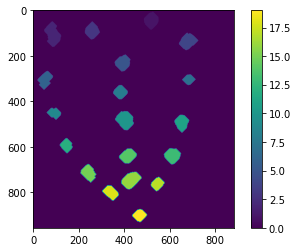

In [21]:
plt.imshow(mask_labeled)
np.unique(mask_labeled)
plt.colorbar()

In [23]:
# Coordinates of centers of objects, filter out too small and too large objects
min_size = 20
max_size = 10000
coords_pred = []
for o in sorted(np.unique(mask_labeled))[1:]:
    if np.sum(mask_labeled == o) >= min_size and np.sum(mask_labeled == o) <= max_size:
        coords = list(np.mean(np.argwhere(mask_labeled == o), axis=0))
        coords_pred += [coords]
print(coords_pred)

[[45.48416810592976, 519.5866436384571], [106.63061059441974, 86.47048119692681], [90.82942430703625, 259.34267438318614], [137.07046632124352, 680.7432642487047], [231.64017725258492, 394.56514032496307], [306.0121289498883, 53.44909032875838], [304.62703681351843, 684.2558841279421], [359.9011244668476, 383.64831329972856], [451.9738562091503, 93.38310708898945], [482.54452204277607, 403.943474465299], [494.34456692913386, 653.3316535433071], [593.8081945069788, 146.73390364700586], [638.5732287874545, 612.4206104732568], [639.6194140278188, 417.1163065995857], [714.5590742996346, 243.90560292326433], [745.6384987335942, 430.0080589454294], [762.2312062937064, 546.5524475524476], [800.1156391501219, 341.47648902821317], [899.9729965156795, 467.93379790940764]]


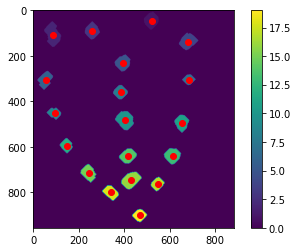

In [27]:
plt.imshow(mask_labeled)
np.unique(mask_labeled)
plt.colorbar()
X = [c[1]for c in coords_pred]
Y = [c[0]for c in coords_pred]
plt.scatter(X,Y,color='red')

In [24]:
coords_pred

[[45.48416810592976, 519.5866436384571],
 [106.63061059441974, 86.47048119692681],
 [90.82942430703625, 259.34267438318614],
 [137.07046632124352, 680.7432642487047],
 [231.64017725258492, 394.56514032496307],
 [306.0121289498883, 53.44909032875838],
 [304.62703681351843, 684.2558841279421],
 [359.9011244668476, 383.64831329972856],
 [451.9738562091503, 93.38310708898945],
 [482.54452204277607, 403.943474465299],
 [494.34456692913386, 653.3316535433071],
 [593.8081945069788, 146.73390364700586],
 [638.5732287874545, 612.4206104732568],
 [639.6194140278188, 417.1163065995857],
 [714.5590742996346, 243.90560292326433],
 [745.6384987335942, 430.0080589454294],
 [762.2312062937064, 546.5524475524476],
 [800.1156391501219, 341.47648902821317],
 [899.9729965156795, 467.93379790940764]]

# Zwaartepunt red dots

In [28]:
np.array(coords_pred)

array([[ 45.48416811, 519.58664364],
       [106.63061059,  86.4704812 ],
       [ 90.82942431, 259.34267438],
       [137.07046632, 680.74326425],
       [231.64017725, 394.56514032],
       [306.01212895,  53.44909033],
       [304.62703681, 684.25588413],
       [359.90112447, 383.6483133 ],
       [451.97385621,  93.38310709],
       [482.54452204, 403.94347447],
       [494.34456693, 653.33165354],
       [593.80819451, 146.73390365],
       [638.57322879, 612.42061047],
       [639.61941403, 417.1163066 ],
       [714.5590743 , 243.90560292],
       [745.63849873, 430.00805895],
       [762.23120629, 546.55244755],
       [800.11563915, 341.47648903],
       [899.97299652, 467.93379791]])

In [33]:
mean = np.mean(np.array(coords_pred),axis=0)
print(mean)
print(mean[0]) #Y-coordinaat
print(mean[1]) #X-coordinaat

[463.45138602 390.46668125]
463.45138601618504


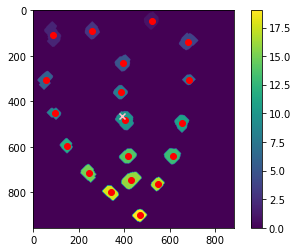

In [35]:
plt.imshow(mask_labeled)
np.unique(mask_labeled)
plt.colorbar()
X = [c[1]for c in coords_pred]
Y = [c[0]for c in coords_pred]
plt.scatter(X,Y,color='red')
plt.scatter([mean[1]],[mean[0]],color='pink', marker = 'x')